In [98]:
#importing pkgs
import os
import pandas as pd   ## Import Pandas as pd
import numpy as np    ## Import Numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [102]:
hdf = pd.read_csv('C:\Users\HasvithaSai\Desktop\IIITB\PredictiveAnalysis\LinearRegressionAssignment\train.csv')
hdf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [103]:
print(hdf.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [104]:
print(hdf.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [105]:
print(hdf.shape)

(1460, 81)


In [106]:
print(hdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [107]:
print(hdf.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [108]:
#Checking for the NA in Data frame
N1 = pd.DataFrame(round(100*(hdf.isnull().sum()/len(hdf.index)), 2))

In [109]:
N1[N1[0] > 0]

0
LotFrontage   17.74
Alley         93.77
MasVnrType     0.55
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

In [110]:
hdf['Alley'] = hdf['Alley'].fillna('NAAlley')

In [111]:
hdf['FireplaceQu'] = hdf['FireplaceQu'].fillna('NAFireplace')

In [112]:
hdf['PoolQC'] = hdf['PoolQC'].fillna('NOPool')

In [113]:
hdf['Fence'] = hdf['Fence'].fillna('NOFence')

In [114]:
hdf['MiscFeature'] = hdf['MiscFeature'].fillna('NOMiscFeature')

In [115]:
N2 = pd.DataFrame(round(100*(hdf.isnull().sum()/len(hdf.index)), 2))

In [116]:
N2[N2[0] > 0]

0
LotFrontage   17.74
MasVnrType     0.55
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55

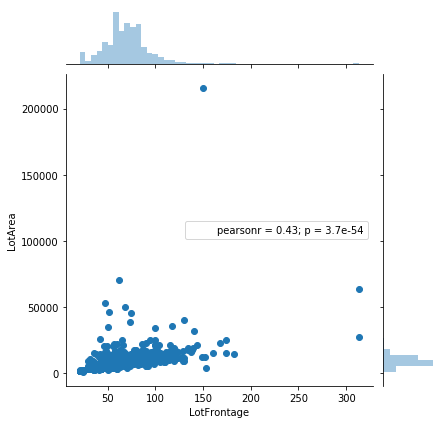

In [117]:
sns.jointplot('LotFrontage', 'LotArea', hdf)
plt.show()

In [118]:
#dropping LotFrontage for high correlation with area
hdf2 = hdf.drop(['LotFrontage'],axis=1)

In [119]:
N3 = pd.DataFrame(round(100*(hdf2.isnull().sum()/len(hdf2.index)), 2))

In [120]:
N3[N3[0] > 0]

0
MasVnrType    0.55
MasVnrArea    0.55
BsmtQual      2.53
BsmtCond      2.53
BsmtExposure  2.60
BsmtFinType1  2.53
BsmtFinType2  2.60
Electrical    0.07
GarageType    5.55
GarageYrBlt   5.55
GarageFinish  5.55
GarageQual    5.55
GarageCond    5.55

In [121]:
print(hdf2[['GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']])

     GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0        Attchd       2003.0          RFn           2         548         TA   
1        Attchd       1976.0          RFn           2         460         TA   
2        Attchd       2001.0          RFn           2         608         TA   
3        Detchd       1998.0          Unf           3         642         TA   
4        Attchd       2000.0          RFn           3         836         TA   
5        Attchd       1993.0          Unf           2         480         TA   
6        Attchd       2004.0          RFn           2         636         TA   
7        Attchd       1973.0          RFn           2         484         TA   
8        Detchd       1931.0          Unf           2         468         Fa   
9        Attchd       1939.0          RFn           1         205         Gd   
10       Detchd       1965.0          Unf           1         384         TA   
11      BuiltIn       2005.0          Fi

In [122]:
(hdf2[['YearBuilt','GarageYrBlt']]).corr(method='pearson')

YearBuilt  GarageYrBlt
YearBuilt     1.000000     0.825667
GarageYrBlt   0.825667     1.000000

In [123]:
hdf2 = hdf2.drop('GarageYrBlt',axis=1)

In [124]:
## Impute Values in place of nulls

hdf2['BsmtQual'] = hdf2['BsmtQual'].fillna('NBasement')

In [125]:
hdf2['BsmtCond'] = hdf2['BsmtCond'].fillna('NBasement')

In [126]:
hdf2['BsmtExposure'] = hdf2['BsmtExposure'].fillna('NBasement')

In [127]:
hdf2['BsmtFinType1'] = hdf2['BsmtFinType1'].fillna('NBasement')

In [128]:
hdf2['BsmtFinType2'] = hdf2['BsmtFinType2'].fillna('NBasement')

In [129]:
hdf2['GarageType'] = hdf2['GarageType'].fillna('NGarage')

In [130]:
hdf2['GarageFinish'] = hdf2['GarageFinish'].fillna('NGarage')

In [131]:
hdf2['GarageQual'] = hdf2['GarageQual'].fillna('NGarage')

In [132]:
hdf2['GarageCond'] = hdf2['GarageCond'].fillna('NGarage')

In [133]:
N4 = pd.DataFrame(round(100*(hdf2.isnull().sum()/len(hdf2.index)), 2))

In [134]:
print(N4[N4[0] > 0])

               0
MasVnrType  0.55
MasVnrArea  0.55
Electrical  0.07


In [135]:
hdf2.dropna(inplace=True)

In [136]:
N4 = pd.DataFrame(round(100*(hdf2.isnull().sum()/len(hdf2.index)), 2))

In [137]:
N4[N4[0] > 0]

Empty DataFrame
Columns: [0]
Index: []

In [138]:
#checking distinct values

for i in hdf2.columns:
    print(i,':-',hdf2[i].unique())

Id :- [   1    2    3 ... 1458 1459 1460]
MSSubClass :- [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning :- ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotArea :- [ 8450  9600 11250 ... 17217 13175  9717]
Street :- ['Pave' 'Grvl']
Alley :- ['NAAlley' 'Grvl' 'Pave']
LotShape :- ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :- ['AllPub' 'NoSeWa']
LotConfig :- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :- ['Gtl' 'Mod' 'Sev']
Neighborhood :- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :- ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :- ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :- ['2Story' '1Story' '1.5Fin' '1.5Unf

In [139]:

categorical = ['object']

cdf = hdf2.select_dtypes(include=categorical)  

In [140]:
print(cdf.info())
print(cdf.columns)
print(cdf.head())
print(cdf.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1451 non-null object
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 non-null object
ExterQual        1451 non-null object
ExterCond        1451 non-null object
Foundation       1451 non-null object
BsmtQual         1451 non-null object
BsmtCond         1451 non-null object
BsmtExposure     14

In [141]:
cdf.isnull().sum() / cdf.shape[0] * 100.00

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [142]:
hdf2 = hdf2.drop(['Street','Utilities','PoolQC'],axis=1)

In [143]:
hdf2['MSSubClass'] = hdf2.MSSubClass.astype(object)

In [144]:
hdf2.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotArea            int64
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
                  ...   
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object


In [145]:
#checking date variables

In [146]:
hdf2.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
        ... 
1430    2005
1431    1976
1432    1927
1433    2000
1434    1977
1435    1962
1436    1971
1437    2008
1438    1957
1439    1979
1440    1922
1441    2004
1442    2008
1443    1916
1444    2004
1445    1966
1446    1962
1447    1995
1448    1910
1449    1970
1450    1974
1451    2008
1452    2005
1453    2006
1454    2004
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1451, dtype: int64

In [147]:
hdf2.MoSold

0        2
1        5
2        9
3        2
4       12
5       10
6        8
7       11
8        4
9        1
10       2
11       7
12       9
13       8
14       5
15       7
16       3
17      10
18       6
19       5
20      11
21       6
22       9
23       6
24       5
25       7
26       5
27       5
28      12
29       5
        ..
1430     7
1431    10
1432     8
1433     5
1434     5
1435     7
1436     5
1437    11
1438     4
1439    11
1440     9
1441     5
1442     4
1443     5
1444    11
1445     5
1446     4
1447    12
1448     5
1449     8
1450     9
1451     5
1452     5
1453     7
1454    10
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1451, dtype: int64

In [148]:
hdf2.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
5       2009
6       2007
7       2009
8       2008
9       2008
10      2008
11      2006
12      2008
13      2007
14      2008
15      2007
16      2010
17      2006
18      2008
19      2009
20      2006
21      2007
22      2008
23      2007
24      2010
25      2009
26      2010
27      2010
28      2006
29      2008
        ... 
1430    2006
1431    2009
1432    2007
1433    2008
1434    2006
1435    2008
1436    2007
1437    2008
1438    2010
1439    2007
1440    2008
1441    2008
1442    2009
1443    2009
1444    2007
1445    2007
1446    2010
1447    2007
1448    2007
1449    2006
1450    2009
1451    2009
1452    2006
1453    2006
1454    2009
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1451, dtype: int64

In [149]:
#creating age of property

In [150]:
hdf2['Age_of_Property'] = hdf2['YrSold']-hdf2['YearBuilt']

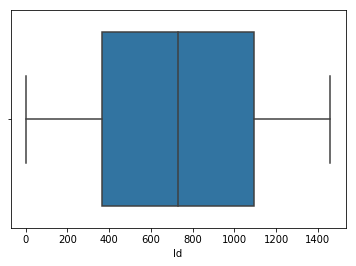

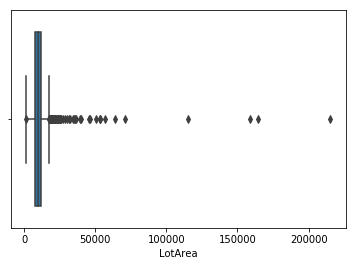

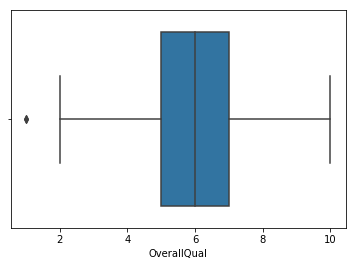

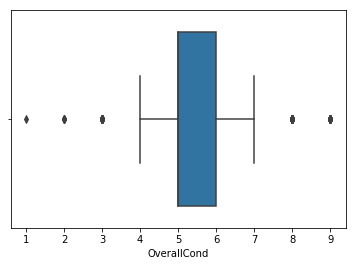

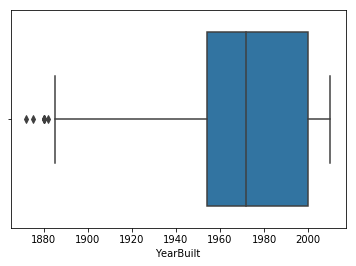

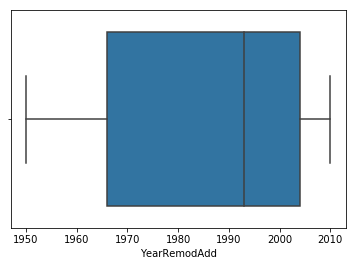

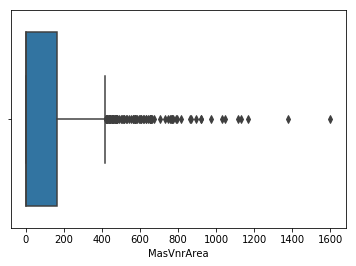

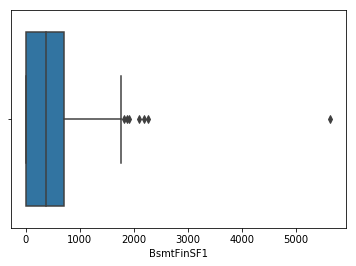

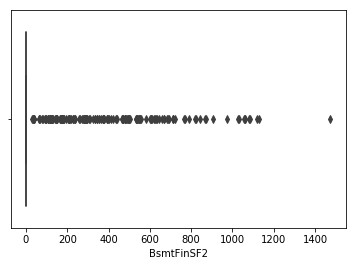

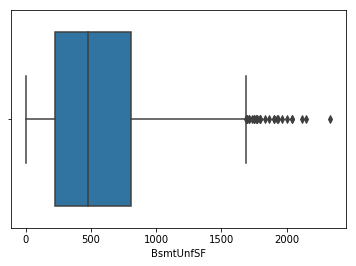

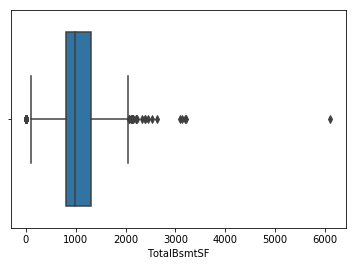

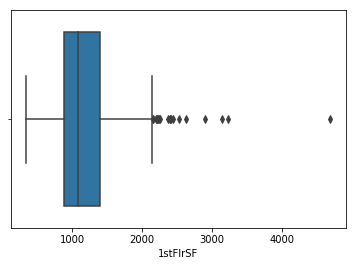

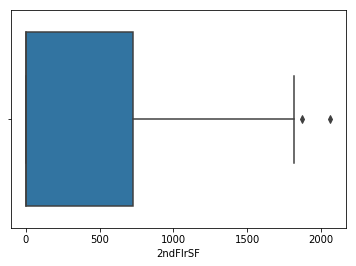

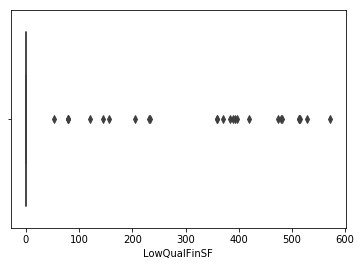

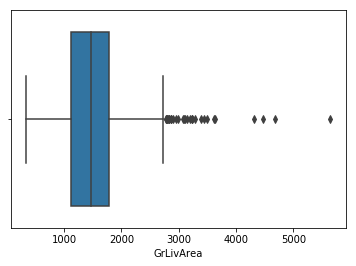

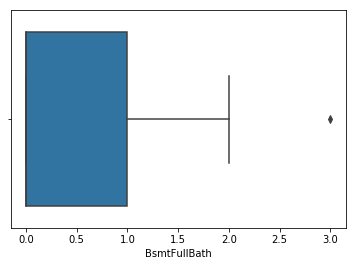

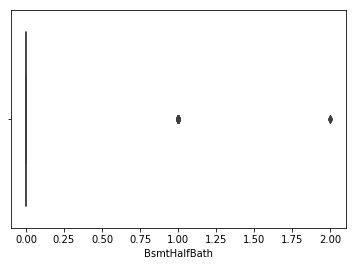

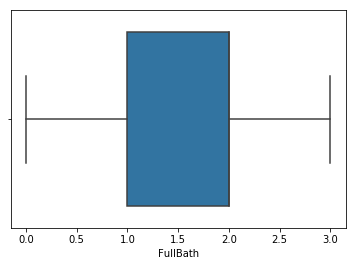

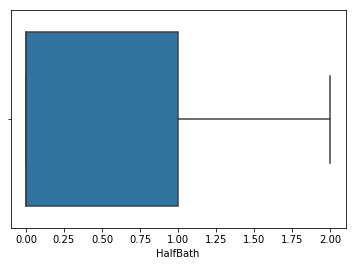

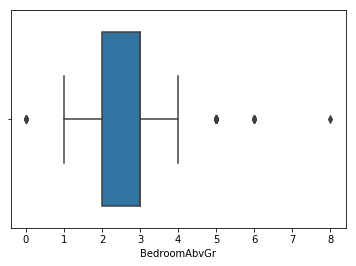

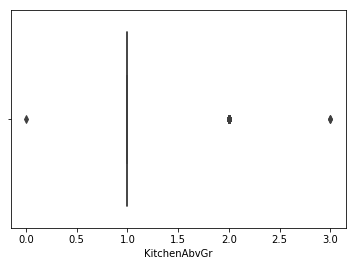

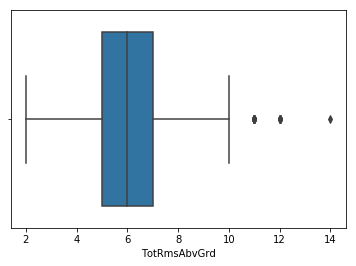

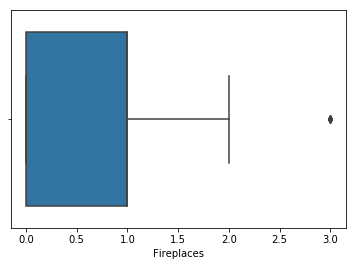

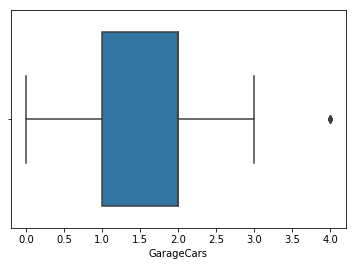

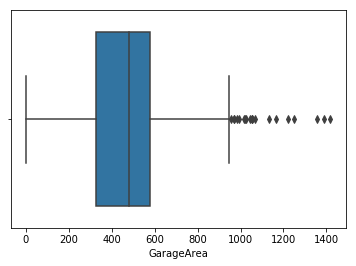

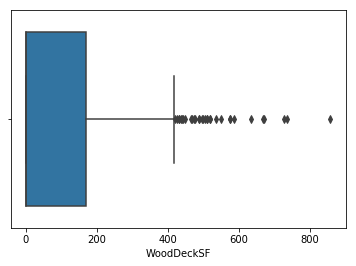

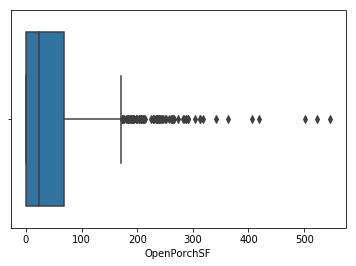

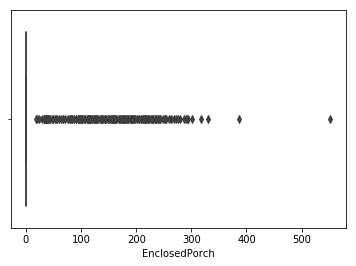

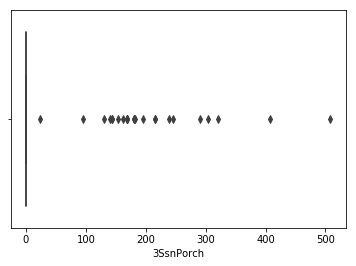

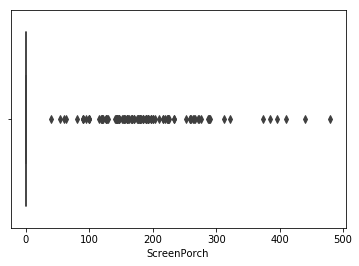

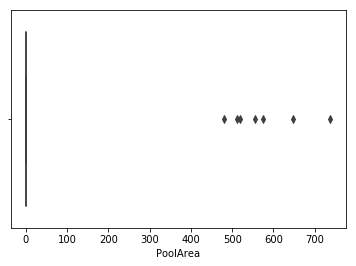

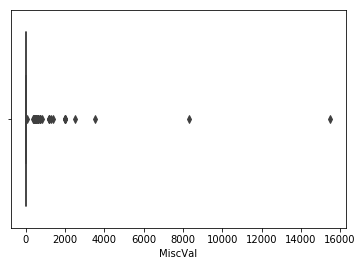

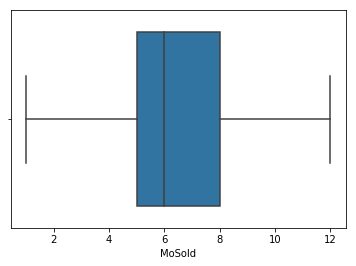

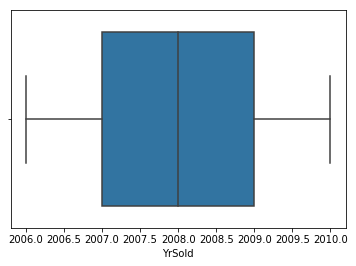

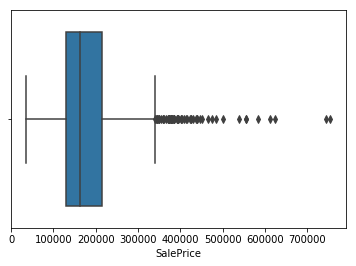

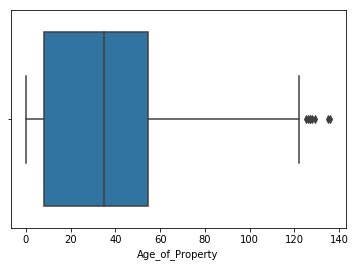

In [154]:
for i in hdf2.columns:
    if (hdf2[i].dtypes in ('float64','int64')):
      sns.boxplot(x = i, data = hdf2)
      plt.show()

In [155]:
for i in hdf2.columns:
    if (hdf2[i].dtypes in ('int64','float64')):
      print(hdf2.groupby(i).Id.count())

Id
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
       ..
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
1460    1
Name: Id, Length: 1451, dtype: int64
LotArea
1300       1
1477       1
1491       1
1526       1
1533       2
1596       1
1680      10
1869       1
1890       2
1920       1
1936       1
1950       1
1953       1
1974       1
2001       1
2016       1
2117       3
2160       1
2217       1
2268       1
2280       3
2289       1
2308       2
2368       1
2448       1
2500       1
2522

LowQualFinSF
0      1425
53        1
80        3
120       1
144       1
156       1
205       1
232       1
234       1
360       2
371       1
384       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
528       1
572       1
Name: Id, dtype: int64
GrLivArea
334     1
438     1
480     1
520     1
605     1
616     1
630     6
672     2
691     1
693     1
694     1
698     1
708     1
720     3
729     1
747     2
752     1
754     1
764     1
767     1
768     3
773     1
774     1
778     1
780     1
784     2
788     1
789     2
790     1
792     1
       ..
2775    1
2784    1
2792    1
2794    1
2810    1
2822    1
2828    1
2868    1
2872    2
2898    1
2945    1
2978    1
3082    1
3086    1
3112    1
3140    1
3194    1
3222    1
3228    1
3238    1
3279    1
3395    1
3447    1
3493    1
3608    1
3627    1
4316    1
4476    1
4676    1
5642    1
Name: Id, Length: 858, dtype: int64
BsmtFullBath
0    85

In [156]:
hdf2.shape

(1451, 77)

In [ ]:
#correlation checking

In [157]:
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [158]:
hdf2_num = hdf2.select_dtypes(include=num)

<Figure size 7200x7200 with 0 Axes>

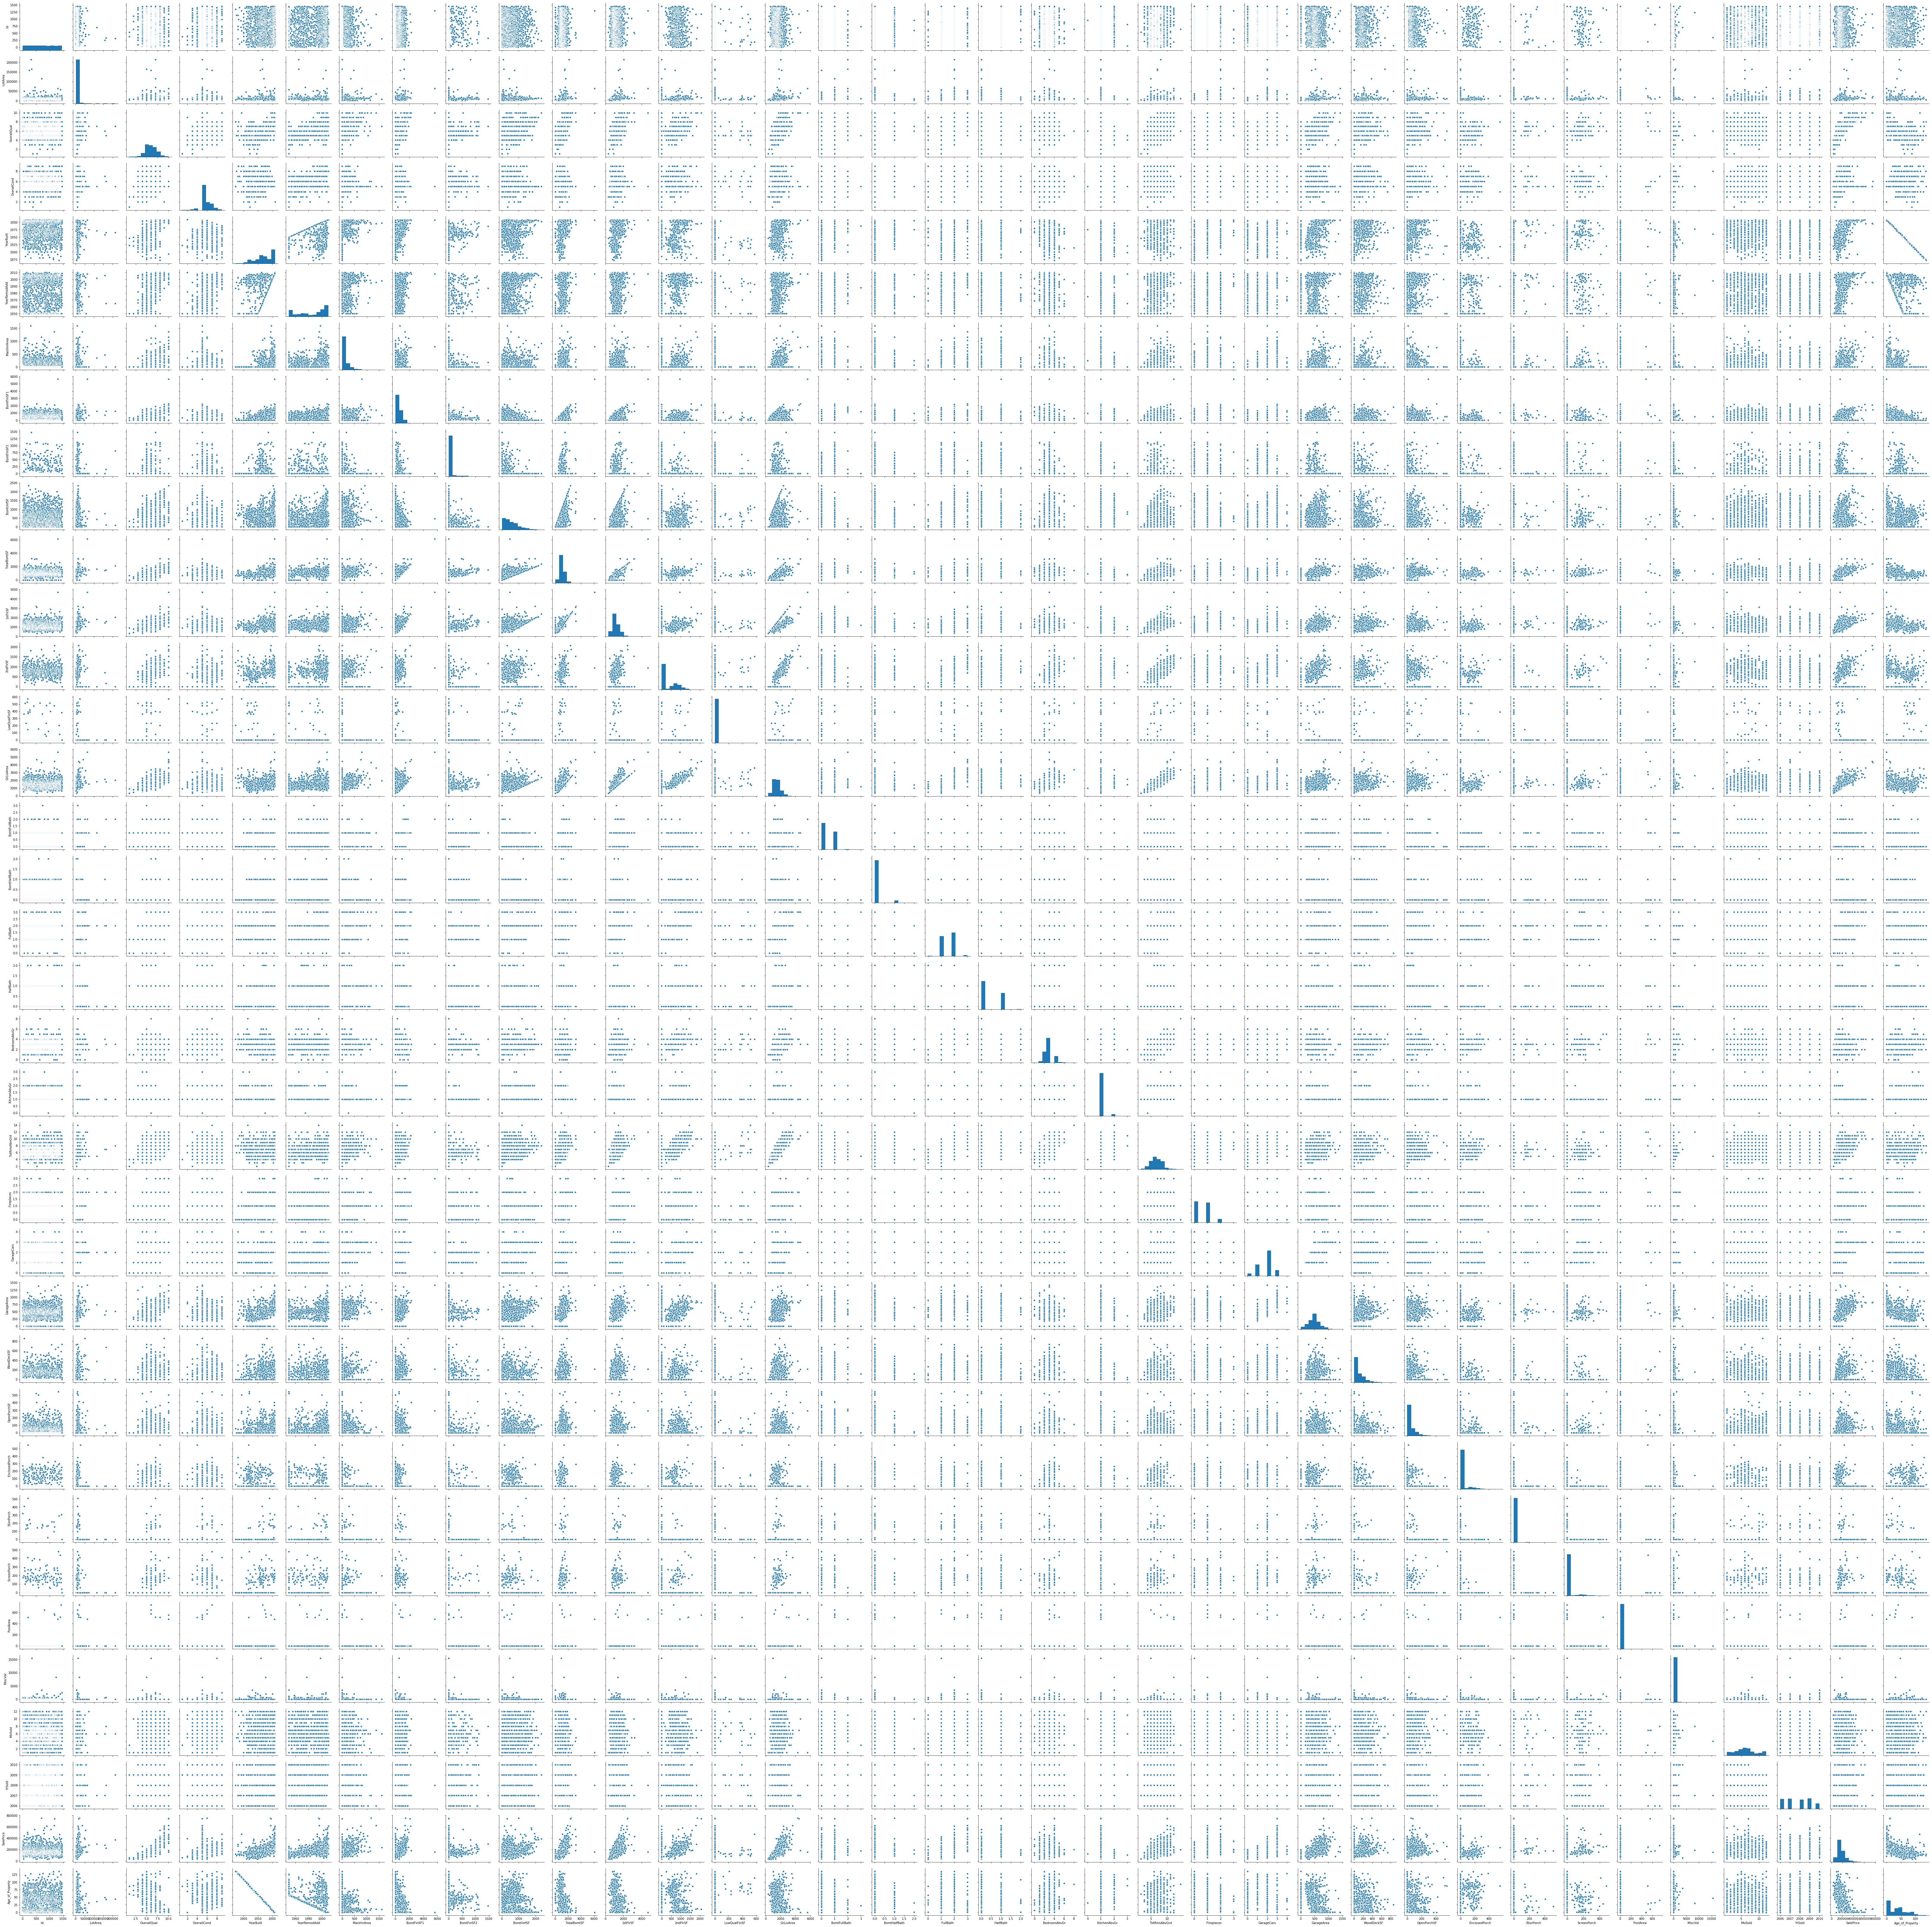

In [159]:
plt.figure(figsize=(100,100))
sns.pairplot(hdf2_num)
plt.show()

In [161]:
hdf4 = hdf2.drop(['YearBuilt','1stFlrSF','TotRmsAbvGrd','GarageCars'],axis=1)

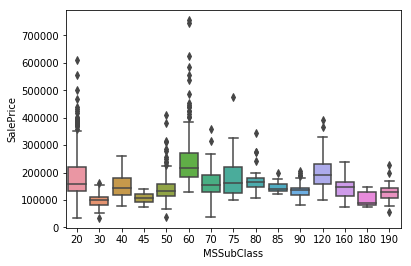

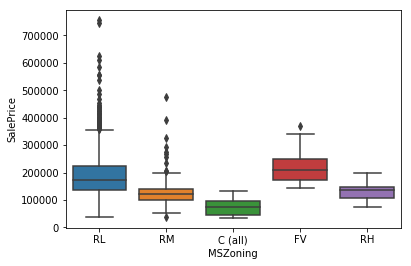

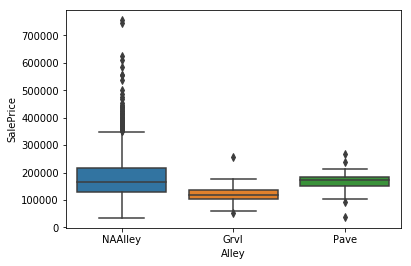

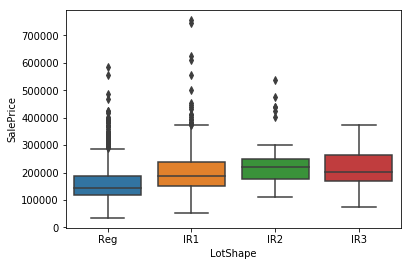

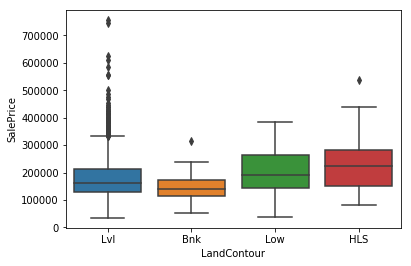

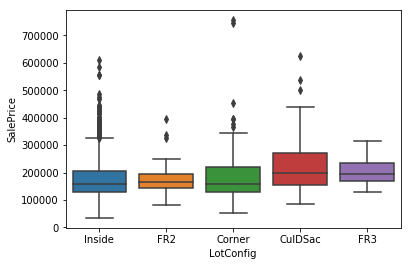

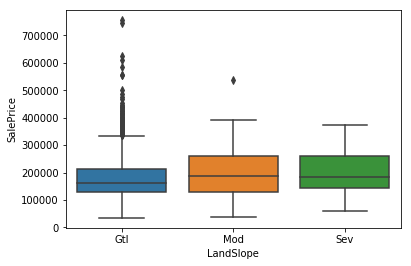

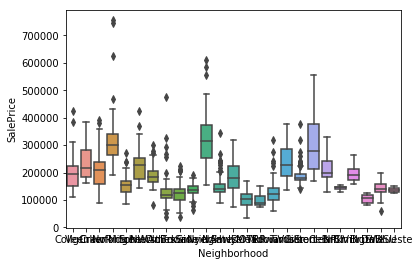

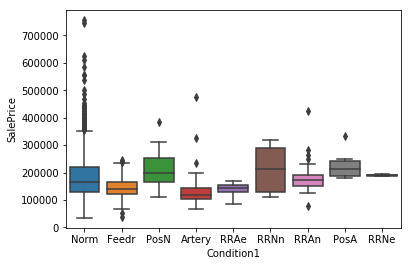

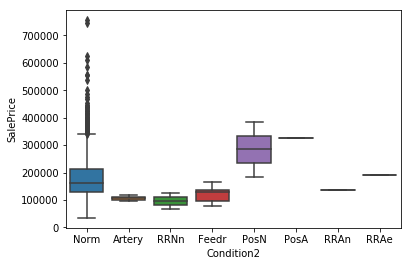

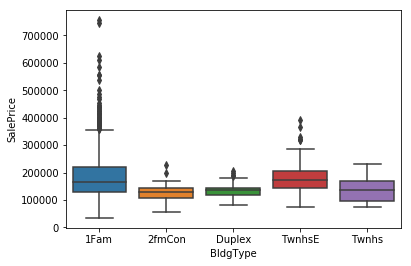

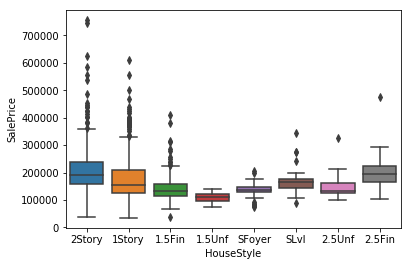

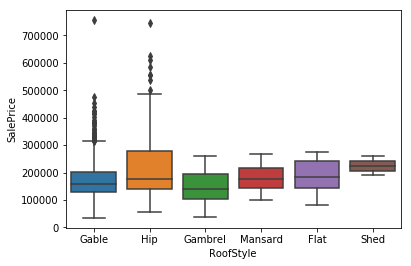

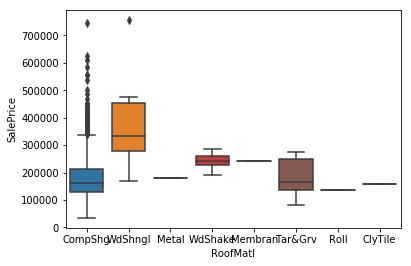

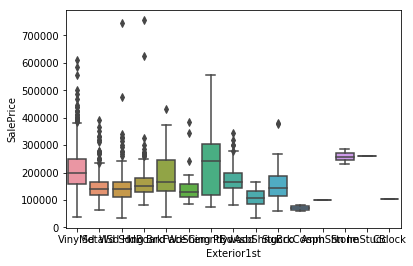

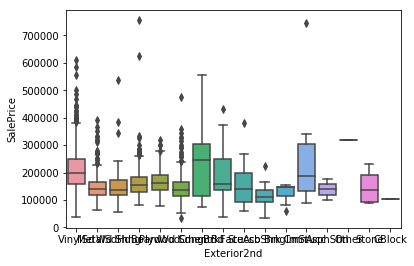

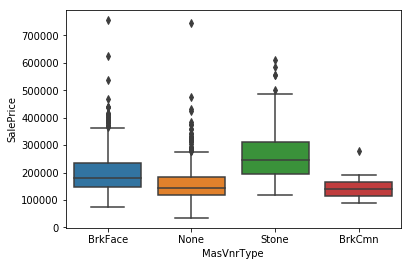

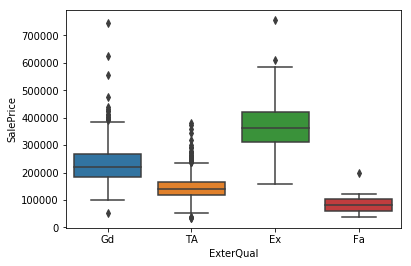

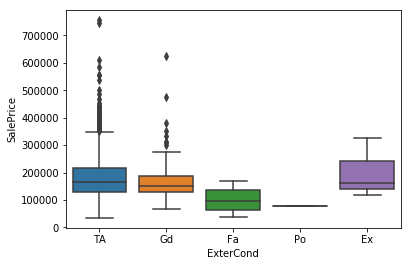

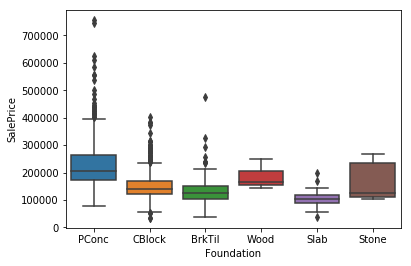

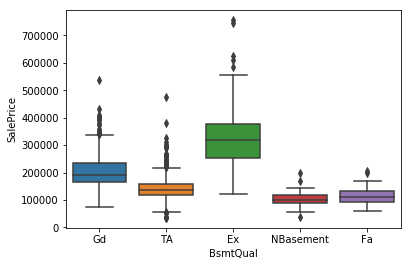

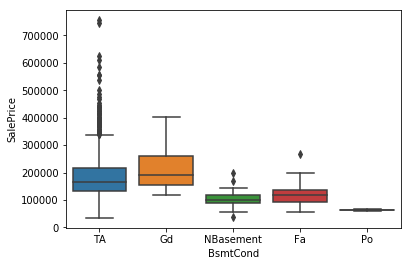

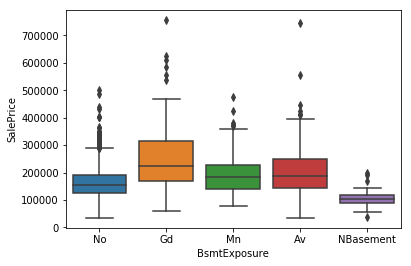

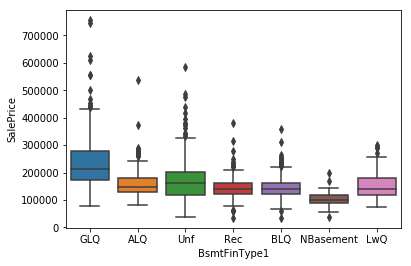

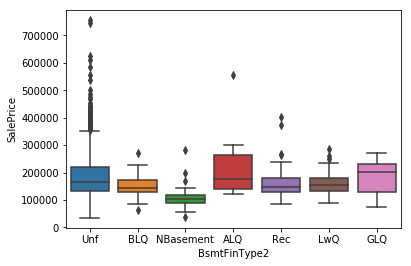

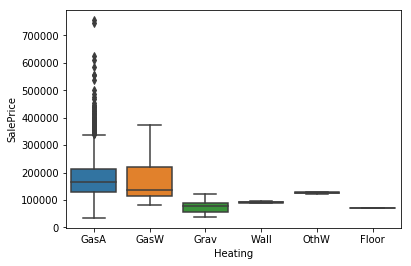

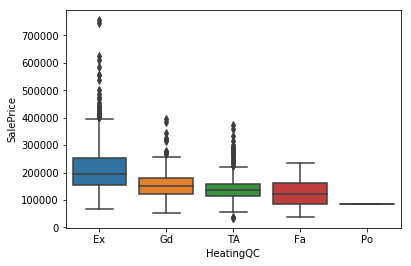

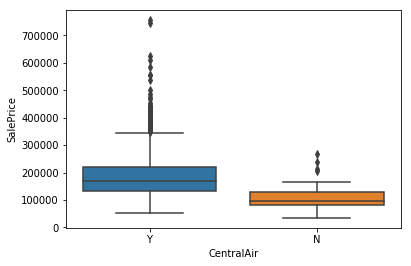

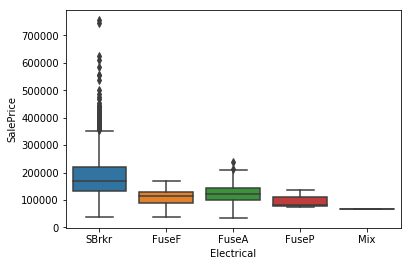

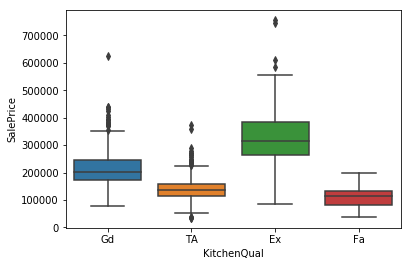

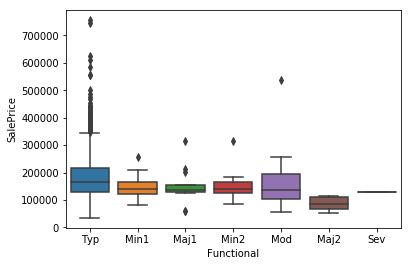

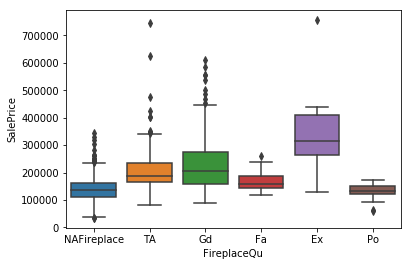

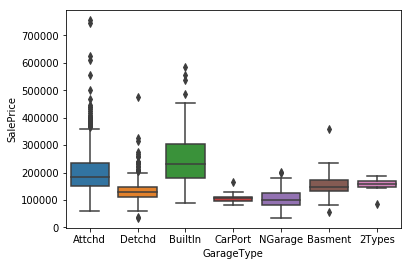

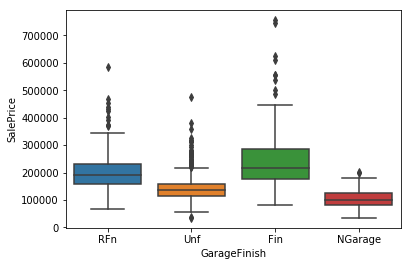

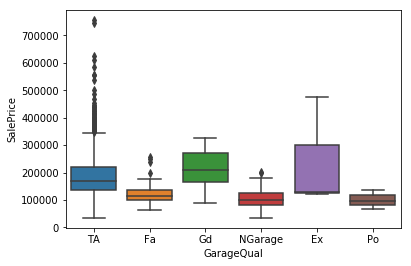

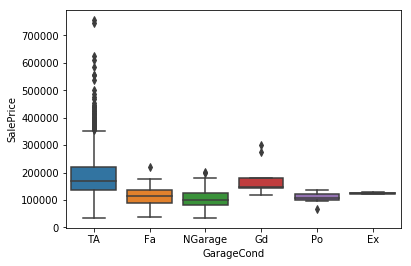

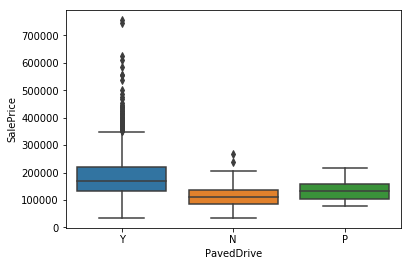

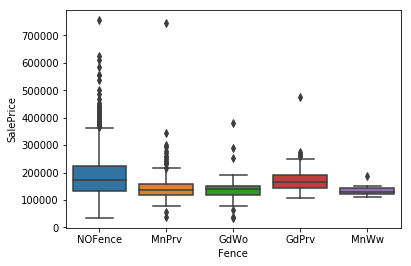

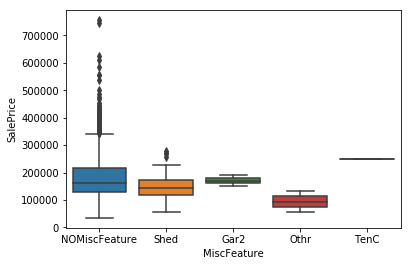

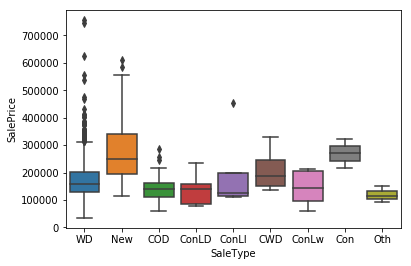

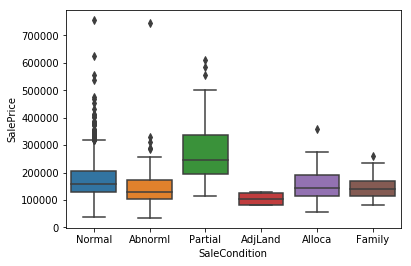

In [162]:

for i in hdf4.columns:
    if (hdf4[i].dtypes == 'object'):
      sns.boxplot(x=i, y='SalePrice', data=hdf4)
      plt.show()

In [ ]:
#dummy variables of categorical

In [163]:
hdf_c = hdf4.select_dtypes(include=['object'])

In [164]:
hdf_c.head()

MSSubClass MSZoning    Alley LotShape LandContour LotConfig LandSlope  \
0         60       RL  NAAlley      Reg         Lvl    Inside       Gtl   
1         20       RL  NAAlley      Reg         Lvl       FR2       Gtl   
2         60       RL  NAAlley      IR1         Lvl    Inside       Gtl   
3         70       RL  NAAlley      IR1         Lvl    Corner       Gtl   
4         60       RL  NAAlley      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...       FireplaceQu GarageType  \
0      CollgCr       Norm       Norm      ...       NAFireplace     Attchd   
1      Veenker      Feedr       Norm      ...                TA     Attchd   
2      CollgCr       Norm       Norm      ...                TA     Attchd   
3      Crawfor       Norm       Norm      ...                Gd     Detchd   
4      NoRidge       Norm       Norm      ...                TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive    Fence    MiscFeature  \
0          RFn         TA         TA          Y  NOFence  NOMiscFeature   
1          RFn         TA         TA          Y  NOFence  NOMiscFeature   
2          RFn         TA         TA          Y  NOFence  NOMiscFeature   
3          Unf         TA         TA          Y  NOFence  NOMiscFeature   
4          RFn         TA         TA          Y  NOFence  NOMiscFeature   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 41 columns]

In [166]:
# convert into dummies
hdf_dummy = pd.get_dummies(hdf_c, drop_first=True)

In [167]:
hdf_dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 232 columns]

In [168]:
# drop original categorical variables 
A1 = hdf4.drop(list(hdf_c.columns), axis=1)

In [170]:
A1.columns

Index(['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'Age_of_Property'],
      dtype='object')

In [171]:
A2=pd.concat([A1, hdf_dummy], axis=1)

In [172]:
A2.head()

Id  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0   1     8450            7            5          2003       196.0   
1   2     9600            6            8          1976         0.0   
2   3    11250            7            5          2002       162.0   
3   4     9550            7            5          1970         0.0   
4   5    14260            8            5          2000       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
0         706           0        150          856          ...             
1         978           0        284         1262          ...             
2         486           0        434          920          ...             
3         216           0        540          756          ...             
4         655           0        490         1145          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 264 columns]

In [173]:
#Train-Test split

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
np.random.seed(0)
A_train1, A_test1 = train_test_split(A2, train_size = 0.7, test_size = 0.3, random_state = 65)

In [177]:
## Standardization of data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [178]:
A_train1[A1.columns] = scaler.fit_transform(A_train1[A1.columns])

In [179]:
A_train1.head()

Id   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
230 -1.183062 -0.190323    -0.048994     0.368171     -1.201959    0.623660   
816  0.207215  0.091771    -0.759403     0.368171     -1.440536   -0.554899   
433 -0.701447  0.029742    -0.048994    -0.523700      0.658943   -0.554899   
744  0.036396 -0.546514     1.371824    -0.523700      0.420366   -0.554899   
523 -0.487923  3.126432     2.792642    -0.523700      1.136098    3.527201   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
230   -0.963960   -0.274888   1.433898     0.304834          ...             
816    0.065249   -0.274888  -0.090185    -0.111278          ...             
433   -0.963960   -0.274888   0.826079    -0.294726          ...             
744    0.588324   -0.274888   0.095789     0.624748          ...             
523    3.822071   -0.274888   0.717216     4.653879          ...             

     SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
230               0               0             0             0            1   
816               0               0             0             0            1   
433               0               0             0             0            1   
744               0               0             0             0            1   
523               0               0             1             0            0   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
230                      0                     0                     0   
816                      0                     0                     0   
433                      0                     0                     0   
744                      0                     0                     0   
523                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
230                     1                      0  
816                     1                      0  
433                     1                      0  
744                     1                      0  
523                     0                      1  

[5 rows x 264 columns]

In [ ]:
# test data fitting

In [181]:
A_test1[A1.columns] = scaler.transform(A_test1[A1.columns])

In [183]:
A_test1.head()

Id   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
552  -0.419121  0.062239     1.371824    -0.523700      1.040667    0.784373   
496  -0.551980  0.225885     1.371824    -0.523700      0.420366   -0.554899   
950   0.525128 -0.355452    -0.759403     2.151913      0.849805   -0.554899   
1210  1.141974  0.069860    -0.048994    -0.523700      0.372651   -0.554899   
762   0.079101 -0.203025     0.661415    -0.523700      1.183813   -0.554899   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
552    -0.963960   -0.274888   2.601908     1.456973          ...             
496     1.642945   -0.274888   3.191583     4.792583          ...             
950    -0.121110    0.729306  -0.555121    -0.433430          ...             
1210   -0.963960   -0.274888   1.118649    -0.006132          ...             
762    -0.913135   -0.274888   0.386091    -0.675044          ...             

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
552                0               0             0             0            1   
496                0               0             0             0            1   
950                0               0             0             0            1   
1210               0               0             0             0            1   
762                0               0             0             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
552                       0                     0                     0   
496                       0                     0                     0   
950                       0                     0                     0   
1210                      0                     0                     0   
762                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
552                      1                      0  
496                      1                      0  
950                      1                      0  
1210                     1                      0  
762                      1                      0  

[5 rows x 264 columns]

In [185]:
##checking the corelations
corr_1 = A_train1.corr()
for i in corr_1.index:
    for j in corr_1.columns:
        if ((i != j) and ((corr_1.loc[i,j] > 0.60) or (corr_1.loc[i,j] < -0.65))):
            print('Correlation between',i,'&',j,'is  ',corr_1.loc[i,j])

Correlation between OverallQual & GrLivArea is   0.609702143458654
Correlation between OverallQual & GarageArea is   0.6023387123191833
Correlation between OverallQual & SalePrice is   0.788202455933839
Correlation between OverallQual & ExterQual_TA is   -0.6633707622465395
Correlation between MasVnrArea & MasVnrType_None is   -0.6860811895603561
Correlation between BsmtFinSF1 & BsmtFullBath is   0.6395322093353145
Correlation between BsmtFinSF2 & BsmtFinType2_Unf is   -0.710965632895401
Correlation between BsmtUnfSF & BsmtFinType1_Unf is   0.6192784994304831
Correlation between TotalBsmtSF & SalePrice is   0.6028622482245172
Correlation between 2ndFlrSF & GrLivArea is   0.7007403705533243
Correlation between 2ndFlrSF & MSSubClass_60 is   0.6865995158774576
Correlation between 2ndFlrSF & HouseStyle_1Story is   -0.7911196267344719
Correlation between 2ndFlrSF & HouseStyle_2Story is   0.8174581729143342
Correlation between GrLivArea & OverallQual is   0.609702143458654
Correlation betwee

Correlation between BsmtCond_NBasement & Foundation_Slab is   0.8287053549896032
Correlation between BsmtCond_NBasement & BsmtQual_NBasement is   1.0
Correlation between BsmtCond_NBasement & BsmtExposure_NBasement is   1.0
Correlation between BsmtCond_NBasement & BsmtFinType1_NBasement is   1.0
Correlation between BsmtCond_NBasement & BsmtFinType2_NBasement is   0.9808105268566841
Correlation between BsmtExposure_NBasement & Foundation_Slab is   0.8287053549896032
Correlation between BsmtExposure_NBasement & BsmtQual_NBasement is   1.0
Correlation between BsmtExposure_NBasement & BsmtCond_NBasement is   1.0
Correlation between BsmtExposure_NBasement & BsmtFinType1_NBasement is   1.0
Correlation between BsmtExposure_NBasement & BsmtFinType2_NBasement is   0.9808105268566841
Correlation between BsmtFinType1_NBasement & Foundation_Slab is   0.8287053549896032
Correlation between BsmtFinType1_NBasement & BsmtQual_NBasement is   1.0
Correlation between BsmtFinType1_NBasement & BsmtCond_NBas

In [186]:
b_train1 = A_train1['SalePrice']

In [187]:
a_train1 = A_train1.drop('SalePrice',axis=1)

In [189]:
b_test1 = A_test1['SalePrice']

In [190]:
a_test1 = A_test1.drop('SalePrice',axis=1)

In [192]:
#---Lasso Regression----#

In [194]:
# list of alphas to tune
p2 = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]}

la1 = Lasso()
fD2 = 5

In [195]:
# cross validation
model_cv2 = GridSearchCV(estimator = la1, 
                        param_grid = p2, 
                        scoring= 'r2',  
                        cv = fD2, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(A_train1, b_train1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [196]:
cv_rslt = pd.DataFrame(model_cv2.cv_results_)

In [197]:
cv_rslt = cv_rslt[cv_rslt['param_alpha']<=1]

In [198]:
cv_rslt

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.037595      0.007985         0.003199        0.002993      0.0001   
1        0.035293      0.002852         0.002399        0.001959      0.0002   
2        0.033529      0.005333         0.001599        0.001958      0.0003   
3        0.038391      0.012797         0.000000        0.000000      0.0004   
4        0.030189      0.005942         0.001599        0.001959      0.0005   
5        0.034392      0.009327         0.001599        0.001959      0.0006   
6        0.028996      0.009503         0.001599        0.001959      0.0007   
7        0.021922      0.003100         0.002400        0.001960      0.0008   
8        0.024102      0.010033         0.000800        0.001600      0.0009   
9        0.024185      0.002558         0.001600        0.001959       0.001   
10       0.023439      0.002762         0.001924        0.001795       0.002   
11       0.017003      0.002015         0.002400        0.001960       0.003   
12       0.021704      0.004147         0.001600        0.003199       0.004   
13       0.019195      0.002992         0.000800        0.001599       0.005   
14       0.022394      0.008977         0.001600        0.001959       0.006   
15       0.023195      0.010850         0.003199        0.001599       0.007   
16       0.017596      0.001959         0.000000        0.000000       0.008   
17       0.027143      0.018382         0.001596        0.001955       0.009   
18       0.031271      0.014973         0.004205        0.004400        0.01   
19       0.017355      0.002517         0.000798        0.001595        0.02   
20       0.023649      0.012953         0.000809        0.000991        0.03   
21       0.014548      0.002010         0.003599        0.000789        0.04   
22       0.025512      0.014714         0.000000        0.000000        0.05   
23       0.017998      0.003198         0.000796        0.001593        0.06   
24       0.022482      0.011512         0.000000        0.000000        0.07   
25       0.015196      0.001600         0.001600        0.001959        0.08   
26       0.017595      0.004079         0.003199        0.002993        0.09   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           1.000000           1.000000   
1   {'alpha': 0.0002}           1.000000           1.000000   
2   {'alpha': 0.0003}           1.000000           1.000000   
3   {'alpha': 0.0004}           1.000000           1.000000   
4   {'alpha': 0.0005}           1.000000           1.000000   
5   {'alpha': 0.0006}           1.000000           1.000000   
6   {'alpha': 0.0007}           1.000000           1.000000   
7   {'alpha': 0.0008}           0.999999           0.999999   
8   {'alpha': 0.0009}           0.999999           0.999999   
9    {'alpha': 0.001}           0.999999           0.999999   
10   {'alpha': 0.002}           0.999996           0.999996   
11   {'alpha': 0.003}           0.999992           0.999991   
12   {'alpha': 0.004}           0.999985           0.999985   
13   {'alpha': 0.005}           0.999977           0.999976   
14   {'alpha': 0.006}           0.999967           0.999966   
15   {'alpha': 0.007}           0.999955           0.999954   
16   {'alpha': 0.008}           0.999941           0.999940   
17   {'alpha': 0.009}           0.999925           0.999923   
18    {'alpha': 0.01}           0.999907           0.999905   
19    {'alpha': 0.02}           0.999629           0.999622   
20    {'alpha': 0.03}           0.999165           0.999149   
21    {'alpha': 0.04}           0.998515           0.998488   
22    {'alpha': 0.05}           0.997680           0.997637   
23    {'alpha': 0.06}           0.996659           0.996598   
24    {'alpha': 0.07}           0.995452           0.995369   
25    {'alpha': 0.08}           0.994060           0.993952   
26    {'alpha': 0.09}           0.992483           0.992345   

<function matplotlib.pyplot.show(*args, **kw)>

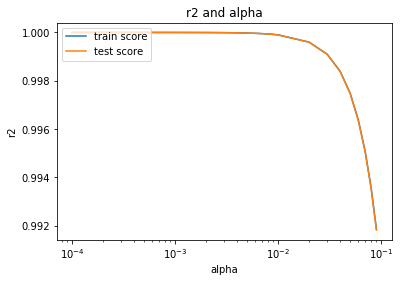

In [200]:
#plotting mean of test and train r2 values

plt.plot(cv_rslt['param_alpha'],cv_rslt['mean_train_score'])
plt.plot(cv_rslt['param_alpha'],cv_rslt['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show

In [201]:
cv_rslt[['param_alpha','mean_train_score','mean_test_score']]

param_alpha  mean_train_score  mean_test_score
0       0.0001          1.000000         1.000000
1       0.0002          1.000000         1.000000
2       0.0003          1.000000         1.000000
3       0.0004          1.000000         1.000000
4       0.0005          1.000000         1.000000
5       0.0006          1.000000         1.000000
6       0.0007          1.000000         1.000000
7       0.0008          0.999999         0.999999
8       0.0009          0.999999         0.999999
9        0.001          0.999999         0.999999
10       0.002          0.999996         0.999996
11       0.003          0.999991         0.999991
12       0.004          0.999984         0.999984
13       0.005          0.999975         0.999975
14       0.006          0.999964         0.999964
15       0.007          0.999951         0.999950
16       0.008          0.999936         0.999935
17       0.009          0.999919         0.999918
18        0.01          0.999900         0.999899
19        0.02          0.999598         0.999596
20        0.03          0.999096         0.999090
21        0.04          0.998393         0.998383
22        0.05          0.997489         0.997473
23        0.06          0.996384         0.996361
24        0.07          0.995078         0.995047
25        0.08          0.993571         0.993531
26        0.09          0.991863         0.991812

In [202]:
# list of alphas to tune
p3 = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]}

la2 = Lasso()
fd3 = 5
# cross validation
model_cv3 = GridSearchCV(estimator = la2, 
                        param_grid = p3, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = fd3, 
                        return_train_score=True,
                        verbose = 1)            

model_cv3.fit(A_train1, b_train1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [203]:
cv_rslt2 = pd.DataFrame(model_cv3.cv_results_)

In [204]:
cv_rslt2 = cv_rslt2[cv_rslt2['param_alpha']<=1]

In [205]:
cv_rslt2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.038897  5.293499e-03         0.001307        0.001667      0.0001   
1        0.032211  2.566600e-03         0.000000        0.000000      0.0002   
2        0.025829  2.263095e-03         0.001600        0.001959      0.0003   
3        0.029968  2.645258e-03         0.007607        0.011358      0.0004   
4        0.023910  1.559888e-03         0.001600        0.001959      0.0005   
5        0.023164  3.045409e-03         0.000800        0.001600      0.0006   
6        0.023713  4.243357e-03         0.001600        0.001959      0.0007   
7        0.029444  5.212188e-03         0.000799        0.001599      0.0008   
8        0.025320  1.503372e-03         0.001599        0.001959      0.0009   
9        0.044258  1.979993e-02         0.005599        0.004079       0.001   
10       0.024611  3.647422e-03         0.002399        0.001959       0.002   
11       0.025927  3.099462e-03         0.000800        0.001599       0.003   
12       0.020903  3.113680e-03         0.000000        0.000000       0.004   
13       0.019749  9.772433e-04         0.001230        0.001618       0.005   
14       0.019995  3.576597e-03         0.000800        0.001599       0.006   
15       0.020794  2.992166e-03         0.001600        0.001960       0.007   
16       0.018396  1.958827e-03         0.001600        0.001960       0.008   
17       0.019195  2.991911e-03         0.001600        0.001960       0.009   
18       0.019196  1.599408e-03         0.000000        0.000000        0.01   
19       0.017595  1.959080e-03         0.000800        0.001600        0.02   
20       0.021594  1.959937e-03         0.000000        0.000000        0.03   
21       0.019995  5.309834e-07         0.000800        0.001599        0.04   
22       0.023194  1.599455e-03         0.000800        0.001600        0.05   
23       0.019995  5.058260e-03         0.000800        0.001600        0.06   
24       0.017596  1.958925e-03         0.000000        0.000000        0.07   
25       0.016856  2.978801e-03         0.000000        0.000000        0.08   
26       0.017167  2.343178e-03         0.000800        0.001600        0.09   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.000067          -0.000065   
1   {'alpha': 0.0002}          -0.000134          -0.000133   
2   {'alpha': 0.0003}          -0.000201          -0.000199   
3   {'alpha': 0.0004}          -0.000268          -0.000266   
4   {'alpha': 0.0005}          -0.000335          -0.000332   
5   {'alpha': 0.0006}          -0.000402          -0.000398   
6   {'alpha': 0.0007}          -0.000469          -0.000465   
7   {'alpha': 0.0008}          -0.000536          -0.000531   
8   {'alpha': 0.0009}          -0.000603          -0.000598   
9    {'alpha': 0.001}          -0.000670          -0.000664   
10   {'alpha': 0.002}          -0.001340          -0.001328   
11   {'alpha': 0.003}          -0.002010          -0.001992   
12   {'alpha': 0.004}          -0.002681          -0.002656   
13   {'alpha': 0.005}          -0.003351          -0.003320   
14   {'alpha': 0.006}          -0.004021          -0.003984   
15   {'alpha': 0.007}          -0.004691          -0.004648   
16   {'alpha': 0.008}          -0.005361          -0.005312   
17   {'alpha': 0.009}          -0.006031          -0.005976   
18    {'alpha': 0.01}          -0.006701          -0.006640   
19    {'alpha': 0.02}          -0.013403          -0.013281   
20    {'alpha': 0.03}          -0.020104          -0.019921   
21    {'alpha': 0.04}          -0.026805          -0.026561   
22    {'alpha': 0.05}          -0.033506          -0.033201   
23    {'alpha': 0.06}          -0.040208          -0.039842   
24    {'alpha': 0.07}          -0.046909          -0.046482   
25    {'alpha': 0.08}          -0.053610          -0.053122   
26    {'alpha': 0.09}          -0.060311          -0.059763   

<function matplotlib.pyplot.show(*args, **kw)>

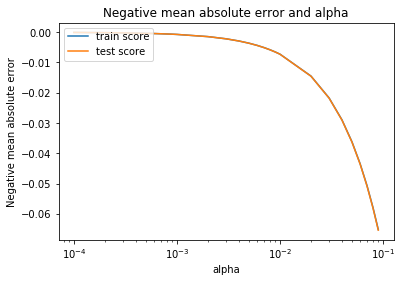

In [206]:
plt.plot(cv_rslt2['param_alpha'],cv_rslt2['mean_train_score'])
plt.plot(cv_rslt2['param_alpha'],cv_rslt2['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative mean absolute error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show

In [211]:
alpha = 0.007

lasso = Lasso(alpha=alpha)
        
lasso.fit(A_train1, b_train1)

Lasso(alpha=0.007, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [212]:
lasso.coef_

array([-0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
        0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,
        0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.993, -0.   ,
       -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,
        0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,
        0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,
      

In [213]:
coeff_val = pd.DataFrame(lasso.coef_)

In [215]:
Model = pd.DataFrame(A_train1.columns)


In [216]:
Lassofinal = pd.concat([Model,coeff_val], axis=1)


In [217]:
Lassofinal.columns = ['Feature','Coefficient']

In [ ]:
#Prediction on train#

In [218]:
y_prdct = lasso.predict(A_train1)
r2 = sklearn.metrics.r2_score(b_train1, y_prdct)
print(r2)

0.999951


In [219]:
#prediction on test#
y_predct_test = lasso.predict(A_test1)
r2 = sklearn.metrics.r2_score(b_test1, y_predct_test)
print(r2)

0.9999509979937596


In [221]:
## MSE for Train set
ms_train = sklearn.metrics.mean_squared_error(b_train1, y_prdct)
print(ms_train)

4.900000000000003e-05


In [224]:
## MSE for Train set
ms_test = sklearn.metrics.mean_squared_error(b_test1, y_predct_test)
print(ms_test)

3.947283787646078e-05


In [225]:
## End Of Lasso #

In [ ]:
#   Ridge Regression  #

In [227]:
# list of alphas to tune
p4 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,75, 100, 500, 1000 ]}

ridge1 = Ridge()
folds4 = 5
# cross validation
model_cv4 = GridSearchCV(estimator = ridge1, 
                        param_grid = p4, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds4, 
                        return_train_score=True,
                        verbose = 1)            

model_cv4.fit(A_train1, b_train1)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 75, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [228]:
cv_rslt4 = pd.DataFrame(model_cv4.cv_results_)

In [229]:
cv_rslt4 = cv_rslt4[cv_rslt4['param_alpha']<=1000]

In [230]:
cv_rslt4

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.040134      0.045706         0.000800        0.001600      0.0001   
1        0.014507      0.001834         0.002399        0.001959       0.001   
2        0.015314      0.003033         0.000800        0.001600        0.01   
3        0.017301      0.002267         0.000000        0.000000        0.05   
4        0.016505      0.003082         0.001105        0.001563         0.1   
5        0.017080      0.002329         0.001599        0.001959         0.2   
6        0.014748      0.002664         0.001306        0.001665         0.3   
7        0.016172      0.000898         0.001208        0.001604         0.4   
8        0.013700      0.001880         0.003098        0.001559         0.5   
9        0.034308      0.019586         0.002393        0.003188         0.6   
10       0.017594      0.001960         0.002399        0.001959         0.7   
11       0.015437      0.002767         0.001599        0.001958         0.8   
12       0.016876      0.002973         0.000000        0.000000         0.9   
13       0.016798      0.001599         0.000800        0.001600           1   
14       0.017597      0.001959         0.001599        0.001958           2   
15       0.017597      0.001959         0.000799        0.001599           3   
16       0.016797      0.001600         0.000000        0.000000           4   
17       0.015997      0.000001         0.001599        0.001958           5   
18       0.016797      0.001600         0.001599        0.001958           6   
19       0.018396      0.003199         0.001599        0.001959           7   
20       0.019192      0.001608         0.000878        0.001756           8   
21       0.017678      0.001689         0.000000        0.000000           9   
22       0.016196      0.000407         0.000800        0.001599          10   
23       0.015170      0.001588         0.001599        0.001958          20   
24       0.018396      0.001959         0.000000        0.000000          50   
25       0.016796      0.001600         0.000000        0.000000          75   
26       0.029004      0.012351         0.002399        0.001959         100   
27       0.014723      0.003016         0.000799        0.001599         500   
28       0.015997      0.001543         0.000795        0.001590        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -7.058104e-07      -5.848117e-07   
1    {'alpha': 0.001}      -7.051828e-06      -5.780706e-06   
2     {'alpha': 0.01}      -6.994296e-05      -5.305395e-05   
3     {'alpha': 0.05}      -3.401185e-04      -2.246502e-04   
4      {'alpha': 0.1}      -6.638364e-04      -4.138829e-04   
5      {'alpha': 0.2}      -1.280289e-03      -7.628872e-04   
6      {'alpha': 0.3}      -1.870916e-03      -1.088958e-03   
7      {'alpha': 0.4}      -2.441391e-03      -1.398473e-03   
8      {'alpha': 0.5}      -2.994795e-03      -1.695707e-03   
9      {'alpha': 0.6}      -3.534599e-03      -1.982522e-03   
10     {'alpha': 0.7}      -4.062929e-03      -2.260101e-03   
11     {'alpha': 0.8}      -4.580132e-03      -2.530550e-03   
12     {'alpha': 0.9}      -5.087027e-03      -2.794273e-03   
13     {'alpha': 1.0}      -5.584417e-03      -3.053003e-03   
14     {'alpha': 2.0}      -1.023588e-02      -5.403166e-03   
15     {'alpha': 3.0}      -1.442934e-02      -7.479231e-03   
16     {'alpha': 4.0}      -1.831205e-02      -9.393420e-03   
17     {'alpha': 5.0}      -2.194183e-02      -1.118834e-02   
18     {'alpha': 6.0}      -2.535151e-02      -1.288376e-02   
19     {'alpha': 7.0}      -2.857155e-02      -1.448598e-02   
20     {'alpha': 8.0}      -3.162264e-02      -1.600690e-02   
21     {'alpha': 9.0}      -3.452407e-02      -1.745975e-02   
22    {'alpha': 10.0}      -3.728817e-02      -1.886893e-02   
23      {'alpha': 20}      -5.999431e-02      -3.094135e-02   
24      {'alpha': 50}      -

In [231]:
# plotting mean test and train scoes with alpha 
cv_rslt4['param_alpha'] = cv_rslt4['param_alpha'].astype('int32')

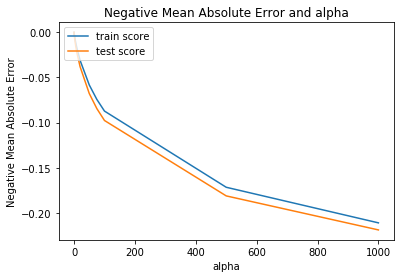

In [232]:

# plotting
plt.plot(cv_rslt4['param_alpha'], cv_rslt4['mean_train_score'])
plt.plot(cv_rslt4['param_alpha'], cv_rslt4['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [233]:
cv_rslt4[['param_alpha','mean_train_score','mean_test_score']]

param_alpha  mean_train_score  mean_test_score
0             0     -3.442343e-07    -6.217937e-07
1             0     -3.420685e-06    -6.152100e-06
2             0     -3.273797e-05    -5.731596e-05
3             0     -1.533308e-04    -2.558134e-04
4             0     -2.983911e-04    -4.854451e-04
5             0     -5.792228e-04    -9.144155e-04
6             0     -8.510242e-04    -1.317810e-03
7             0     -1.115562e-03    -1.701984e-03
8             0     -1.373885e-03    -2.071830e-03
9             0     -1.626892e-03    -2.430397e-03
10            0     -1.875270e-03    -2.779229e-03
11            0     -2.119596e-03    -3.119261e-03
12            0     -2.360275e-03    -3.451075e-03
13            1     -2.597558e-03    -3.775649e-03
14            2     -4.824907e-03    -6.750196e-03
15            3     -6.862260e-03    -9.383697e-03
16            4     -8.762661e-03    -1.179348e-02
17            5     -1.055869e-02    -1.403240e-02
18            6     -1.226808e-02    -1.613104e-02
19            7     -1.390487e-02    -1.811801e-02
20            8     -1.547813e-02    -2.000828e-02
21            9     -1.699473e-02    -2.181829e-02
22           10     -1.846294e-02    -2.356168e-02
23           20     -3.123156e-02    -3.828999e-02
24           50     -5.833919e-02    -6.782500e-02
25           75     -7.443018e-02    -8.458550e-02
26          100     -8.728362e-02    -9.770401e-02
27          500     -1.716317e-01    -1.811864e-01
28         1000     -2.110288e-01    -2.188478e-01

In [234]:
alpha = 70

rid = Ridge(alpha=alpha)
        
rid.fit(A_train1, b_train1)

Ridge(alpha=70, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [235]:
rid.coef_

array([-2.50509498e-03,  3.10621773e-03,  6.07707773e-02,  1.58531316e-02,
        1.37279076e-02,  2.71273417e-02,  5.09845158e-03,  8.79171421e-05,
        5.32454398e-03,  1.06674081e-02,  2.49982065e-02, -7.03458311e-03,
        6.08181363e-02,  1.72333406e-02,  3.94376339e-03,  2.20348683e-02,
        9.00410568e-03, -1.65290307e-03, -1.01151854e-02,  1.57012523e-02,
        2.37724020e-02,  1.29200470e-02, -4.08047289e-03,  4.42896817e-04,
        7.15388921e-04,  8.65359717e-03,  5.37637226e-04, -9.32840983e-04,
       -1.63707705e-03, -4.60055474e-04,  7.16392378e-01, -1.81988692e-02,
       -1.99550788e-03,  1.42382109e-03,  2.45741135e-03,  1.76418759e-03,
       -2.48528495e-04,  4.87583550e-03, -1.57724800e-03, -4.89918805e-03,
       -4.00879749e-03, -1.89891065e-03, -1.85579344e-02, -2.13060270e-02,
       -8.38920273e-04, -2.60862088e-03,  3.90818875e-03,  1.78546448e-03,
        1.56781226e-02, -1.48126167e-02,  6.38359299e-03, -3.65181301e-03,
        4.49800694e-03, -

In [239]:
#Ridge prediction#
y_prediction_train = rid.predict(A_train1)

In [240]:
r2 = sklearn.metrics.r2_score(b_train1, y_prediction_train)

In [241]:
print(r2)

0.9884998268000799


In [242]:
y_pretest = rid.predict(A_test1)


In [243]:
r2 = sklearn.metrics.r2_score(b_test1, y_pretest)


In [244]:
print(r2)

0.9891732556161932


In [ ]:
# MSE for Train and tst #

In [245]:
MeanSQ1 = sklearn.metrics.mean_squared_error(b_train1, y_prediction_train)

In [246]:
print(MeanSQ1)

0.011500173199920093


In [247]:
MeanSQ2 = sklearn.metrics.mean_squared_error(b_test1, y_pretest)


In [249]:
print(MeanSQ2)

0.008721323035140307
